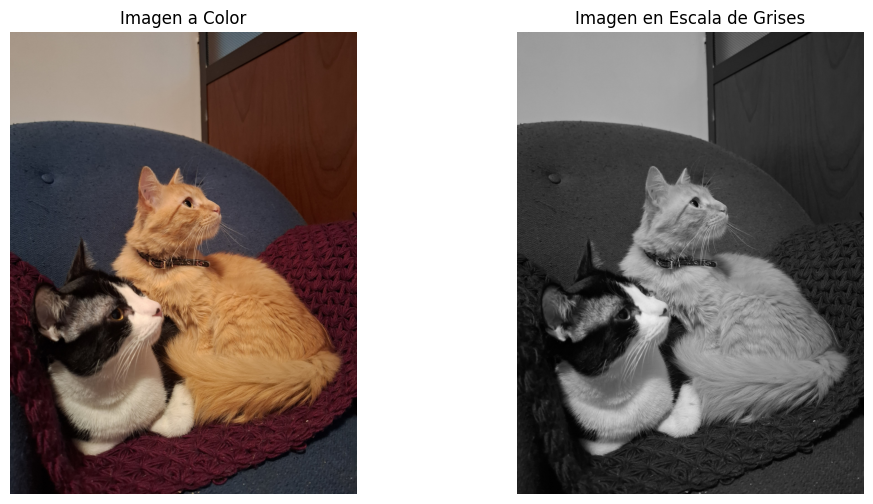

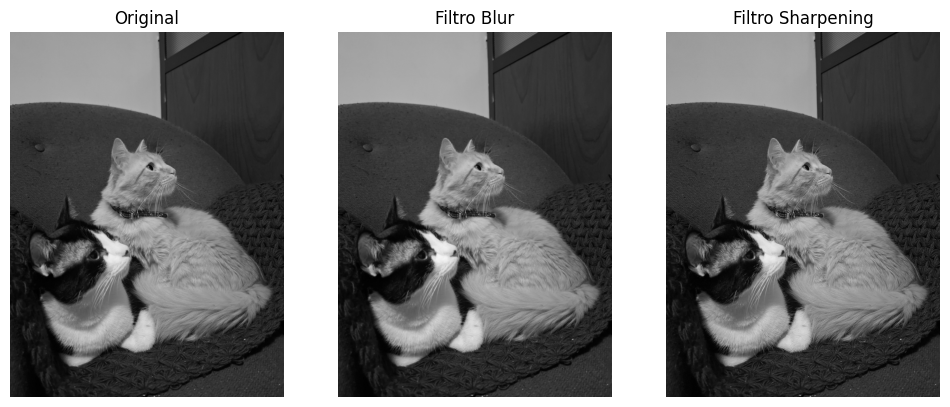

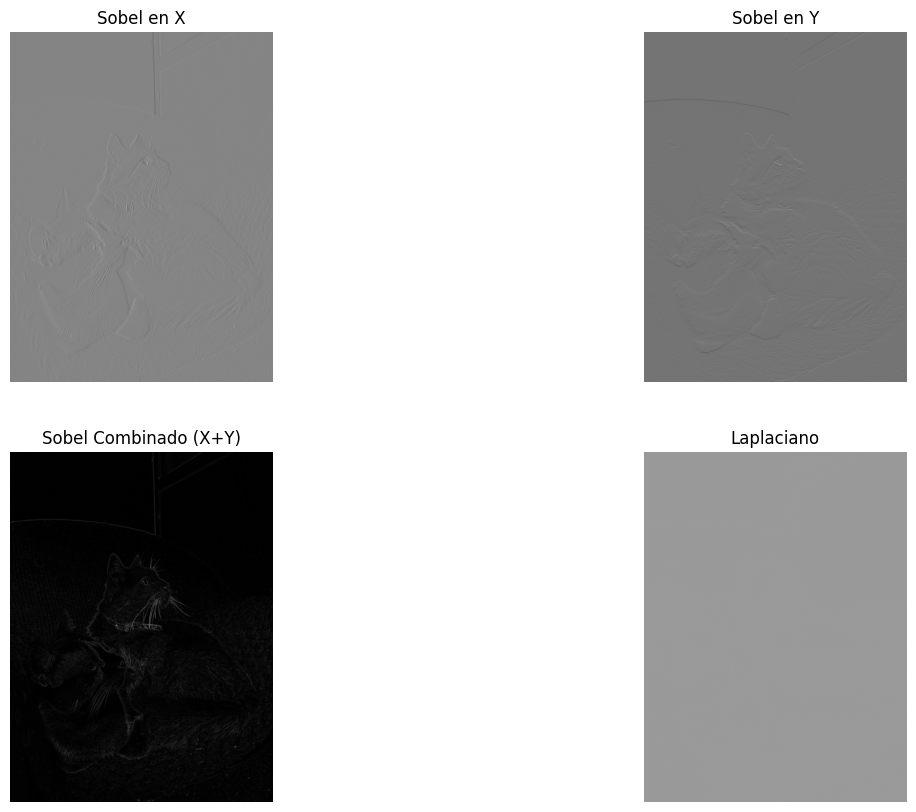

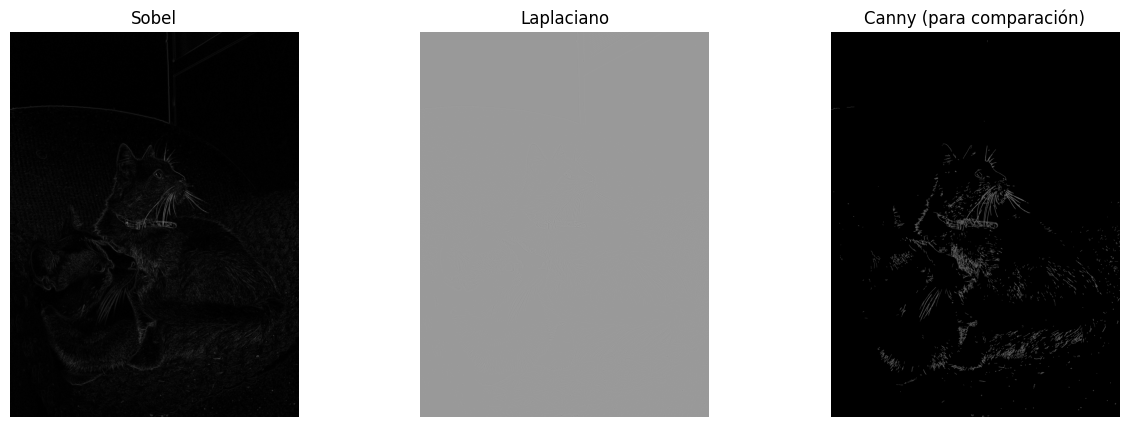

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar imagen a color
image_path = '/content/MichiJuan.jpg'  # Cambia esto por la ruta de tu imagen
color_image = cv2.imread(image_path)

# Verificar que la imagen se cargó correctamente
if color_image is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Convertir a escala de grises
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    # Mostrar imágenes original y en grises
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('Imagen a Color')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Imagen en Escala de Grises')
    plt.axis('off')

    plt.show()

    # Aplicar filtros convolucionales
    # Filtro de desenfoque (blur)
    blur_filter = np.ones((5,5), np.float32)/25
    blurred_image = cv2.filter2D(gray_image, -1, blur_filter)

    # Filtro de sharpening (enfoque)
    sharpening_filter = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(gray_image, -1, sharpening_filter)

    # Mostrar resultados de filtros
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Filtro Blur')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Filtro Sharpening')
    plt.axis('off')

    plt.show()

    # Detección de bordes
    # Sobel en X y Y
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_combined = np.sqrt(sobelx**2 + sobely**2)

    # Laplaciano
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F, ksize=5)

    # Mostrar resultados de detección de bordes
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.imshow(sobelx, cmap='gray')
    plt.title('Sobel en X')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(sobely, cmap='gray')
    plt.title('Sobel en Y')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel Combinado (X+Y)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplaciano')
    plt.axis('off')

    plt.show()

    # Comparación visual entre métodos
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Sobel')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title('Laplaciano')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.Canny(gray_image, 100, 200), cmap='gray')  # Bonus: Canny
    plt.title('Canny (para comparación)')
    plt.axis('off')

    plt.show()